In [1]:
import random
import math
import matplotlib.pyplot as plt
from numba import jit
import numpy as np

**1. Study the problem, implement the iteration and maybe create colourful pictures of the fractal.**

In [2]:
@jit
def iter(z, c):
    return z * z + c


def in_Mandelbrot(c, iter_num, bound=1e3):
    z = complex(0, 0)
    for i in range(iter_num):
        if abs(z) < bound:
            z = iter(z, c)
        else:
            return 0
    return 1

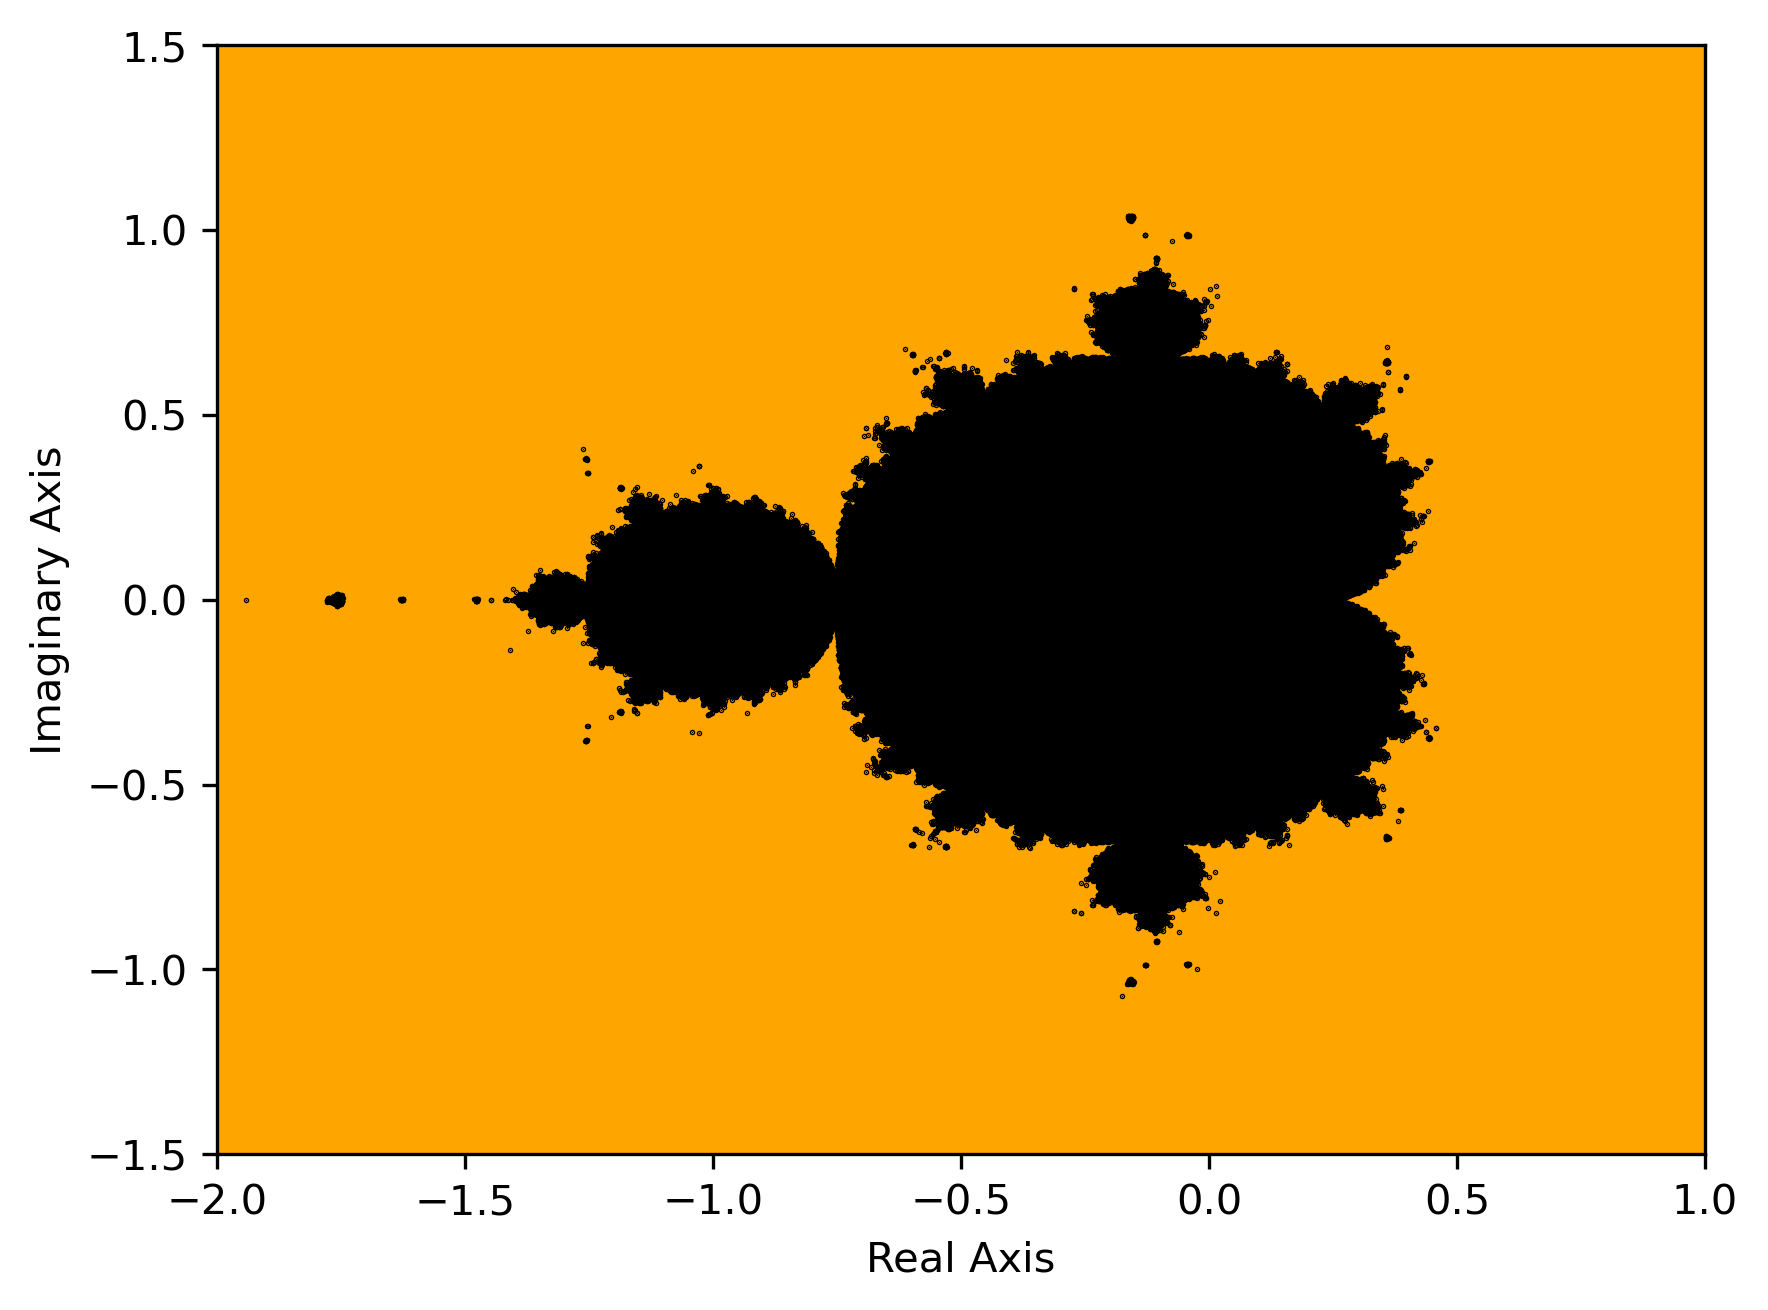

In [3]:
iter_num = 100  # number of iterations
s_num = int(1e7)  # number of samples
bound = 2  # if abs(z) > bound, then we think z will be infinity during future iterations
cs = []  # points in the Mandelbrot set
for s in range(s_num):
    real = random.uniform(-2, 2)
    imag = random.uniform(-2, 2)
    c = complex(real, imag)
    if in_Mandelbrot(c, iter_num, bound):
        cs.append(c)

# Plot the Mandelbrot set
cs_real = [c.real for c in cs]
cs_imag = [c.imag for c in cs]
plt.figure(dpi=300)
ax = plt.subplot()
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")
ax.scatter(
    cs_real,
    cs_imag,
    s=0.1,
    c='k',
)
ax.set_xlim(-2, 1)
ax.set_ylim(-1.5, 1.5)
ax.set_facecolor("orange")
plt.show()

**2. Investigate the convergence of $A_{i,s}\rightarrow A_{M}$ to an extent feasible by the computing power available. In doing that, always balance $i$ ​and $s$ ​so that the errors caused by the finiteness of $i$ ​and $s$​ are comparable (consider computing all $​A_{​j,s}\ \forall\ j​<i$ ​then study $(​A_{j,s}​​-​​A_{i,s}​)$ ​a​s ​a ​​f​unction​ o​f ​$j$​)​.**

In [4]:
def pure_random_sampling(iter_num, s_num, limit=[[-2, 2], [-2, 2]]):
    '''Compute the area of the Mandelbrot set by using pure random sampling.
    Parameters: 
        iter_num: the number of iterations (i)
        s_num: the number of samples (s)
        limit: the limitation of real axis and imaginary axis
    Returns:
        A: the area of the Mandelbrot set
    '''
    bound = 1e6
    cs = []  # points in the Mandelbrot set
    for s in range(s_num):
        real = random.uniform(limit[0][0], limit[0][1])
        imag = random.uniform(limit[1][0], limit[1][1])
        c = complex(real, imag)
        if in_Mandelbrot(c, iter_num, bound):
            cs.append(c)

    # compute the area of the Mandelbrot set
    A_total = (limit[0][1] - limit[0][0]) * (limit[1][1] - limit[1][0])
    A = len(cs) / s_num * A_total

    return A


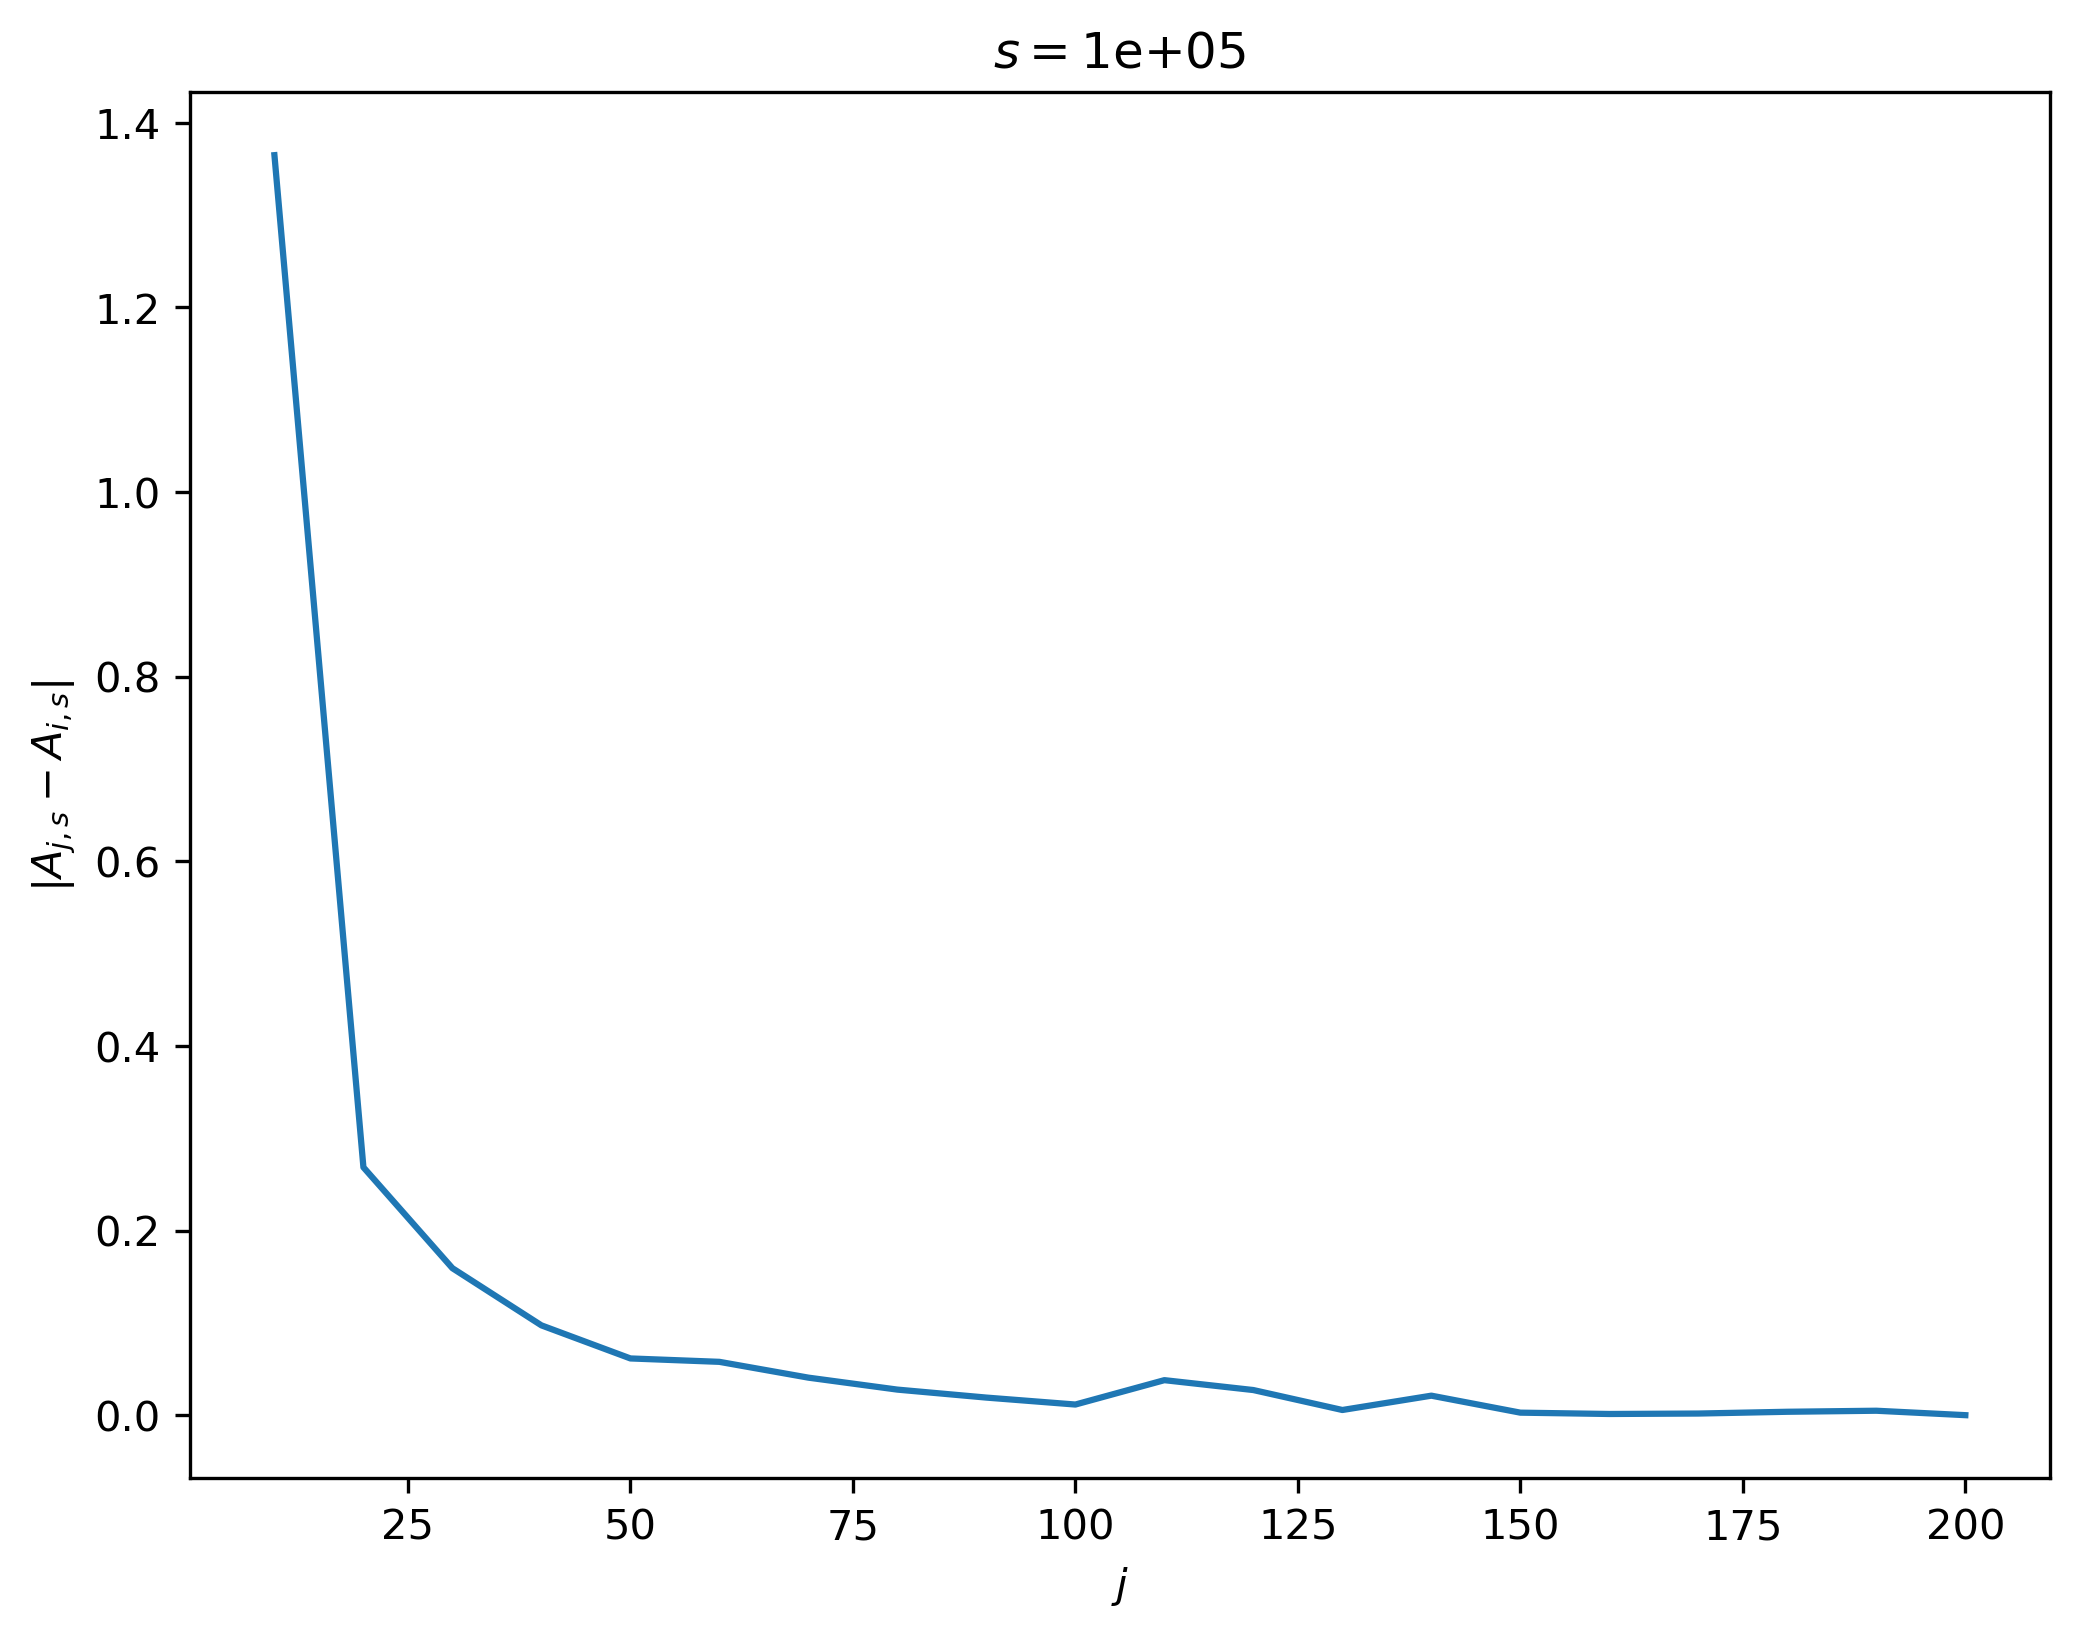

In [34]:
# Investigate the convergence
s = int(1e5)
i = 200
j_start, j_step_len = 10, 10
j_set = np.arange(j_start, i + j_step_len, j_step_len)
As = []
for j in j_set:
    As.append(pure_random_sampling(int(j), s))
As = np.array(As)
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(j_set, abs(As[-1] - As))
plt.title("$s=${:.0e}".format(s))
plt.xlabel(r"$j$")
plt.ylabel(r"$\left|A_{j,s}-A_{i,s}\right|$")
plt.show()

**3. You ​may ​want ​t​o ​c​ompare ​t​he ​q​uality ​of ​t​he ​r​esults ​obtained​ using**
* Pure ​r​andom ​s​ampling,
* Latin ​hypercube ​s​ampling,
* Orthogonal ​s​ampling

**For every method used, provide ​a​n ​e​stimate ​t​he ​a​ccuracy ​of ​your ​c​omputation.**

In [6]:
# Latin hypercube sampling
def Latin_hypercube_sampling(iter_num, s_num, limit=[-2, 2]):
    '''Compute the area of the Mandelbrot set by using Latin hypercube sampling.
    Parameters: 
        iter_num: the number of iterations (i)
        s_num: the number of samples (s)
        limit: the limitation of real axis and imaginary axis
    Returns:
        A: the area of the Mandelbrot set
    '''
    bound = 1e6
    cs = []  # points in the Mandelbrot set
    col_indices = np.arange(s_num)
    np.random.shuffle(col_indices)
    boundings = np.linspace(limit[0], limit[1], s_num + 1)
    for row_index, col_index in enumerate(col_indices):
        real = random.uniform(boundings[col_index], boundings[col_index + 1])
        imag = random.uniform(boundings[row_index], boundings[row_index + 1])
        c = complex(real, imag)
        if in_Mandelbrot(c, iter_num, bound):
            cs.append(c)

    # compute the area of the Mandelbrot set
    A_total = (limit[1] - limit[0])**2
    A = len(cs) / s_num * A_total

    return A

In [7]:
# TODO: Orthogonal sampling


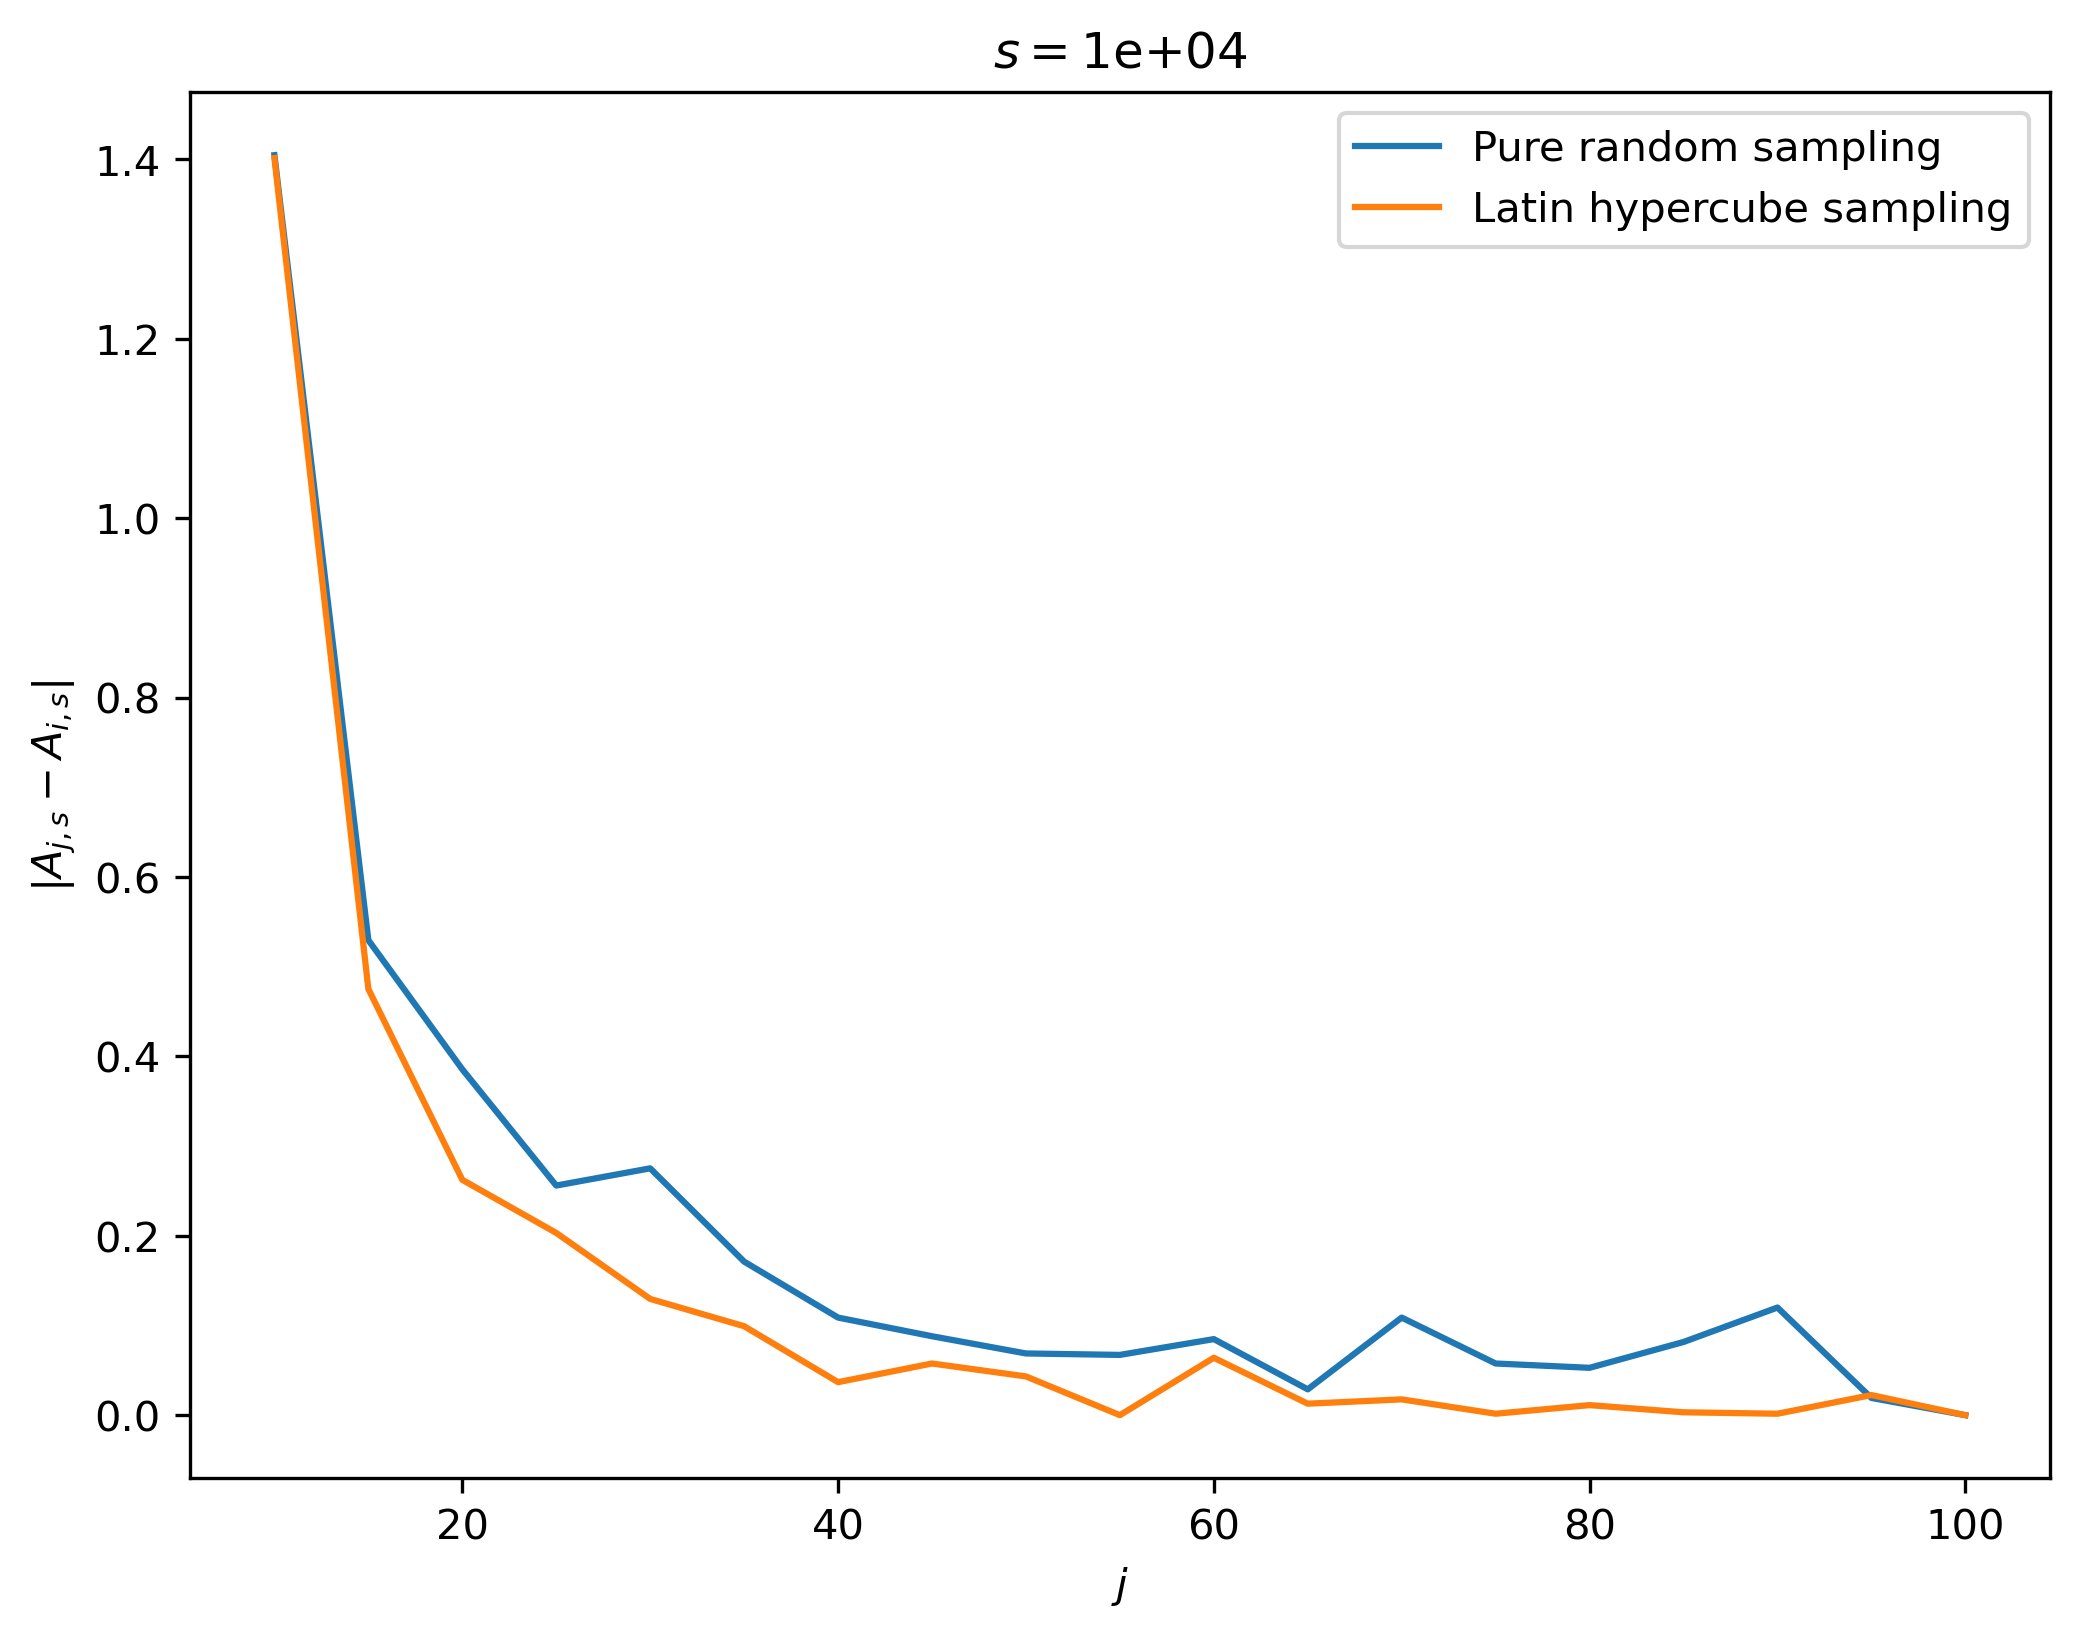

In [39]:
# Investigate the convergence
s = int(1e4)
i = 100
j_start, j_step_len = 10, 5
j_set = np.arange(j_start, i + j_step_len, j_step_len)
A_PRS = []
A_LHS = []
for j in j_set:
    A_PRS.append(pure_random_sampling(int(j), s))
    A_LHS.append(Latin_hypercube_sampling(int(j), s))
A_PRS = np.array(A_PRS)
A_LHS = np.array(A_LHS)
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(j_set, abs(A_PRS[-1] - A_PRS), label=r"Pure random sampling")
plt.plot(j_set, abs(A_LHS[-1] - A_LHS), label=r"Latin hypercube sampling")
plt.title("$s=${:.0e}".format(s))
plt.xlabel(r"$j$")
plt.ylabel(r"$\left|A_{j,s}-A_{i,s}\right|$")
plt.legend()
plt.show()

**4. Formulate and test a method to further improve the convergence rate of the Monte Carlo​a​pproach.**

In [9]:
def circle_sampling(iter_num, s_num, R=2):
    '''Compute the area of the Mandelbrot set by sampling within a circle.
    Parameters:
        iter_num: the number of iterations (i)
        s_num: the number of samples (s)
        R: the radius of the circle
    Returns:
        A: the area of the Mandelbrot set
    '''
    bound = 1e6
    cs = []  # points in the Mandelbrot set

    for s in range(s_num):
        theta = random.uniform(0, 2*math.pi)
        r = R * math.sqrt(random.uniform(0, 1))
        real = r * math.cos(theta)
        imag = r * math.sin(theta)
        c = complex(real, imag)
        if in_Mandelbrot(c, iter_num, bound):
            cs.append(c)

    # compute the area of the Mandelbrot set
    A_total = math.pi * R**2
    A = len(cs) / s_num * A_total
    
    return A

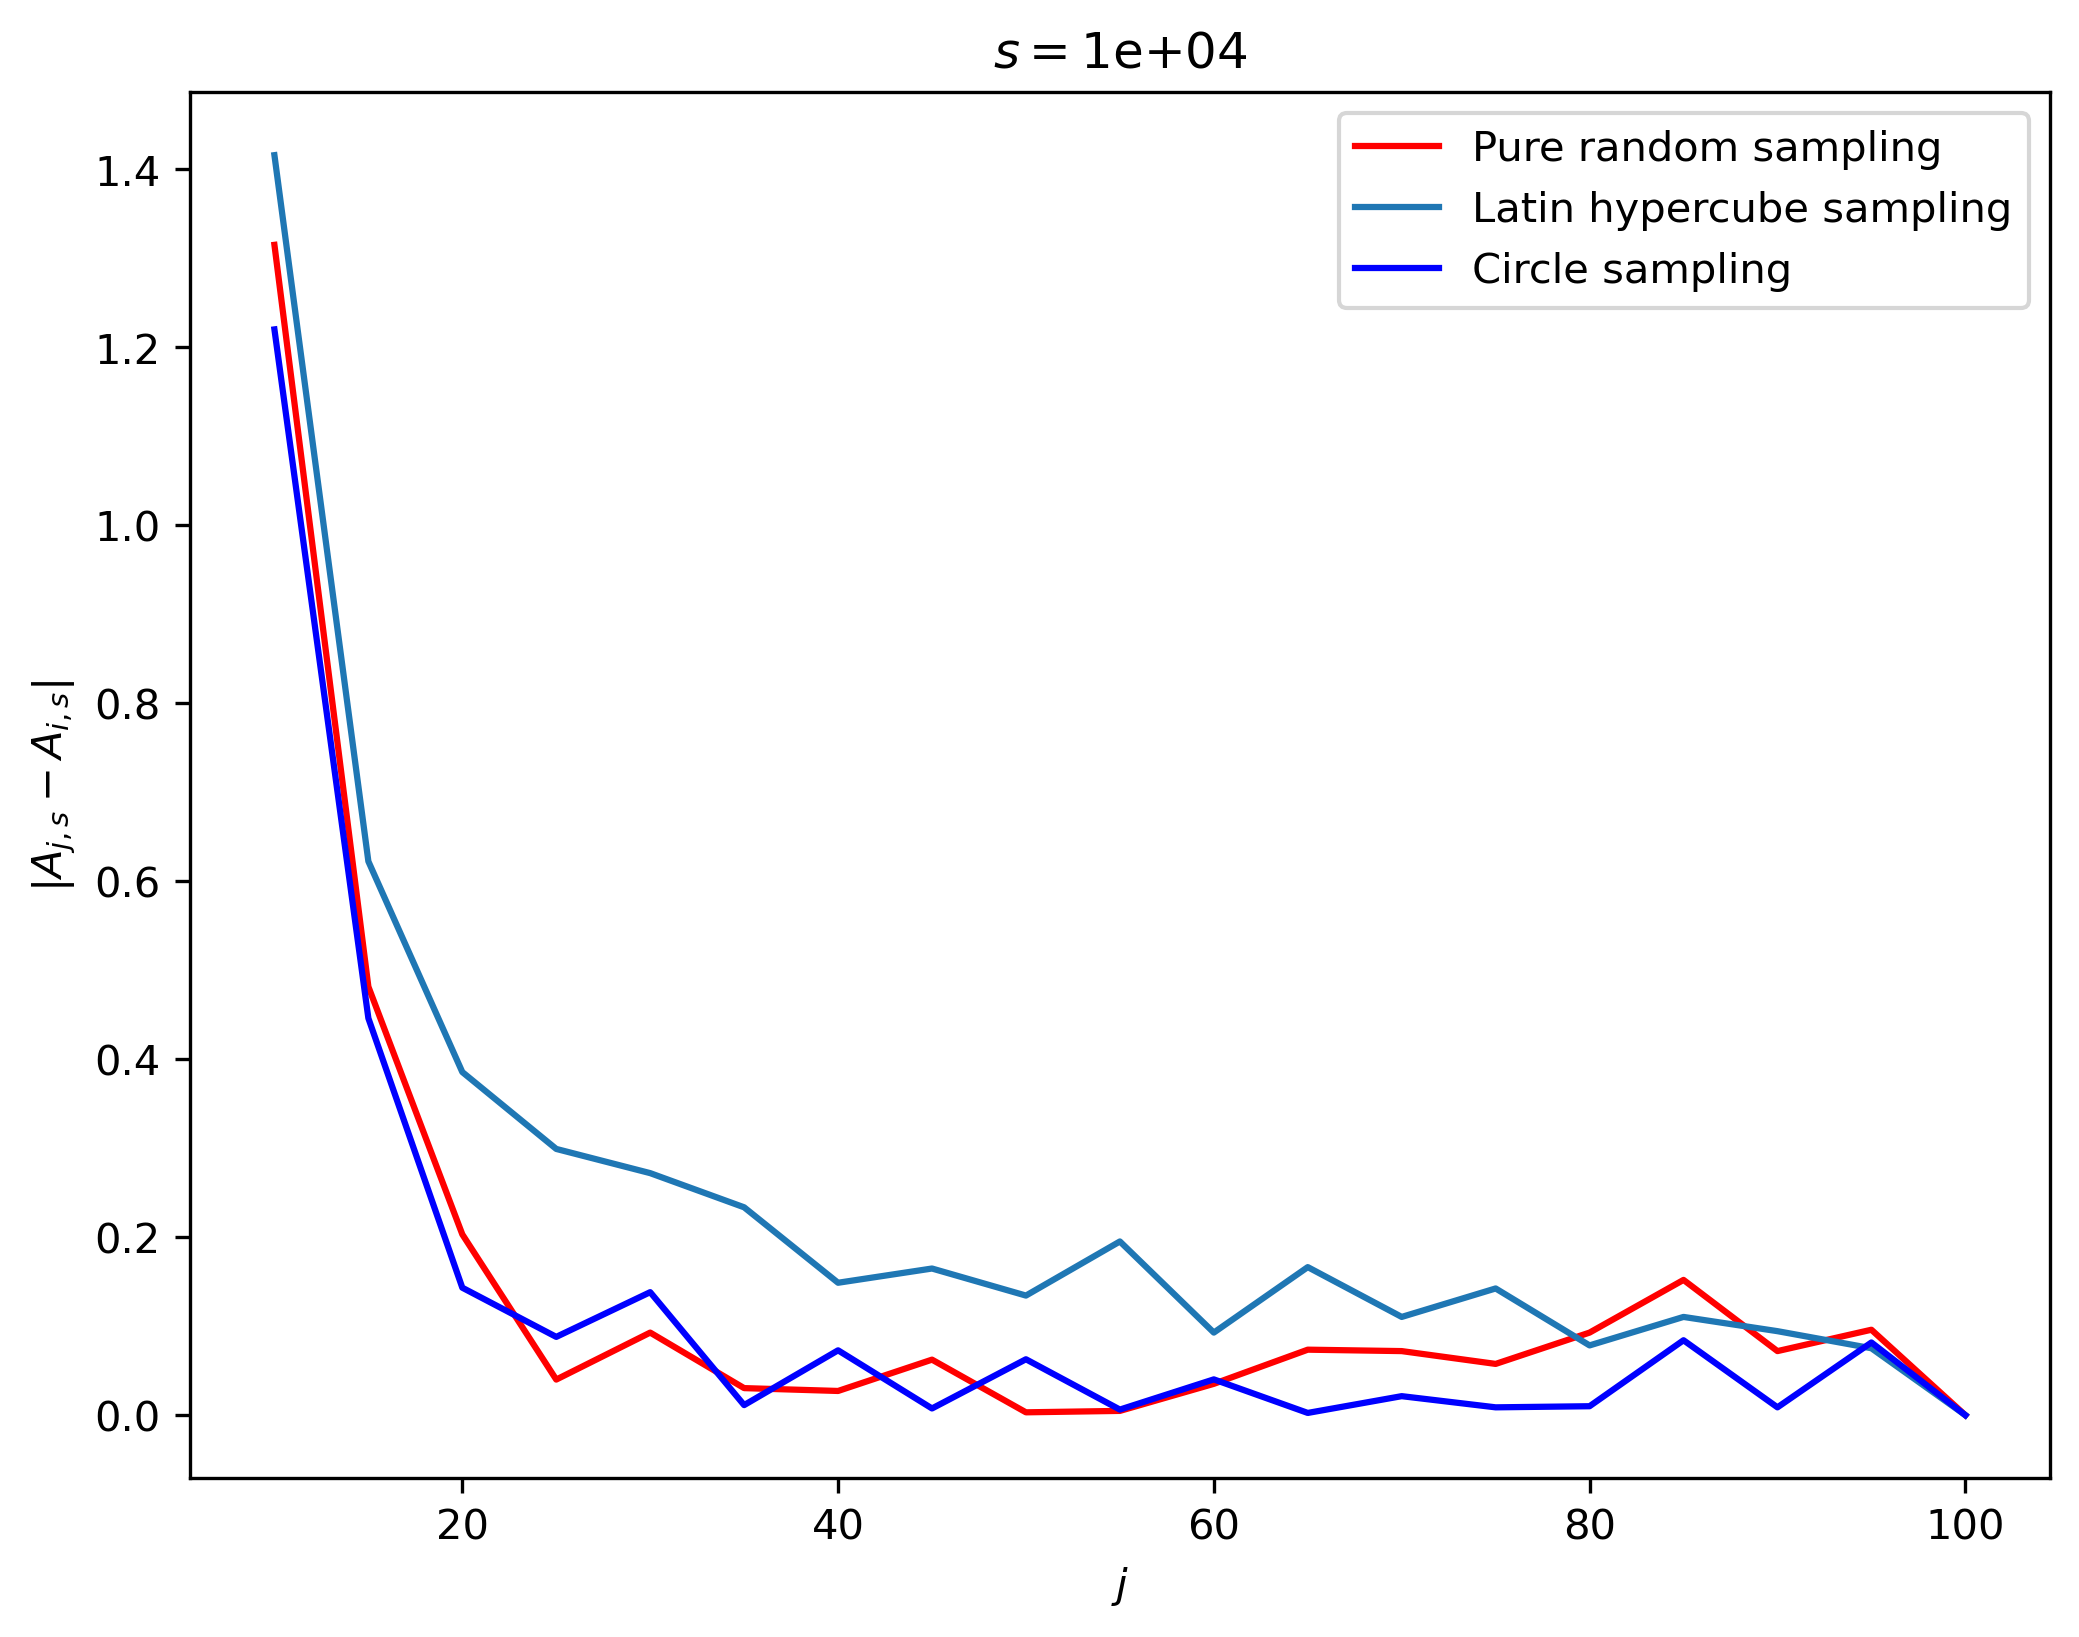

In [40]:
# Investigate the convergence
s = int(1e4)
i = 100
j_start, j_step_len = 10, 5
j_set = np.arange(j_start, i + j_step_len, j_step_len)
A_PRS = []
A_LHS = []
A_CS = []
for j in j_set:
    A_PRS.append(pure_random_sampling(int(j), s))
    A_LHS.append(Latin_hypercube_sampling(int(j), s))
    A_CS.append(circle_sampling(int(j), s))
A_PRS = np.array(A_PRS)
A_LHS = np.array(A_LHS)
A_CS = np.array(A_CS)
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(j_set, abs(A_PRS[-1] - A_PRS), label="Pure random sampling", c='r')
plt.plot(j_set, abs(A_LHS[-1] - A_LHS), label="Latin hypercube sampling")
plt.plot(j_set, abs(A_CS[-1] - A_CS), label="Circle sampling", c='b')
plt.title("$s=${:.0e}".format(s))
plt.xlabel(r"$j$")
plt.ylabel(r"$\left|A_{j,s}-A_{i,s}\right|$")
plt.legend()
plt.show()